<a href="https://colab.research.google.com/github/RaqeebShaikh12/EDA-BIG-MART-SALES/blob/main/EDA_END_TERM_BIG_MART_SALES_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div>
<img src="https://getfranchise.at/wp-content/uploads/2018/05/bigmart-1024x768.jpg" width="500"/>
</div>

## INTRODUCTION

We will be working on big mart sales dataset and try to find the insights for the company to make buisness decisions through exploratory data analysis to predict sales.

### Problem Statement

The data scientists at BigMart have collected sales data for 1559 products across 10 stores in different cities for the year 2013. Now each product has certain attributes that sets it apart from other products.

<div>
<img src="https://nepalijob.com/wp-content/uploads/2018/05/bigmart-600x450.jpg" width="300"/>
</div>

### DATA ID

This dataset is named [BigMart Sales](https://www.kaggle.com/datasets/akashdeepkuila/big-mart-sales). The dataset contains a set of **8,523 records** under  **12 attributes**.

| Column Name                         | Description                                                    |
|------------------                   |----------------------------------------------------------------|
| `Item_Identifier`                   | Unique product ID                                              |
| `Item_Weight`                       | Weight of product                                              |
| `Item_Fat_Content`                  | Checks the Concentration of fat in the product                 |
| `Item_Visibility`                   | The % of total display area of all similar products in a store |
| `Item_Type`                         | Product Category                                               |
| `Item_MRP`                          | Maximum Retail Price for a Product                             |
| `Outlet_Identifier`                 | Store ID                                                       |
| `Outlet_Establishment_Year`         | The year in which store was established                        |
| `Outlet_Size`                       | The size of the store (Area Size Category)                     |
| `Outlet_Location_Type`              | In Terms of city Tiers (Size)                                  |
| `Outlet_Type`                       | Grocery store or a type of    supermarket                      |
| `Item_Outlet_Sales`                 | Sales of the product In the Specific outlet                    |

Our main target is `Item_Outlet_Sales`.

### LIBRARIES

<div>
    <img src="https://th.bing.com/th/id/R.2cc1b7fa037996d004237bacba758d5c?rik=HLnYSGyc7fMLAw&riu=http%3a%2f%2f3.bp.blogspot.com%2f-56ZBPQwiGdo%2fTeVf_FwEcNI%2fAAAAAAAAARw%2fN8AgOjtusTs%2fs1600%2flibrary.jpg&ehk=Yel8TDBetqaaVmuI%2f8FISnhiBQ2B2y%2b27bTp6QjeRw0%3d&risl=&pid=ImgRaw&r=0" width="300"/>
    </div>

In [1]:
#Importing python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importing Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Now, read csv file using pandas library.

In [3]:
inp0=pd.read_csv("/content/drive/MyDrive/csv files/BigMartSales.csv")


In [4]:
inp0.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


We use **head()** method to get the top 5 rows of the dataset. If we want to see n rows from top then we have to write head(n). 

### DATA ANALYSIS

In [48]:
inp0.shape

(8523, 10)

We use **shape** to find the number of rows and columns in the dataset. In this dataset there are 8523 rows and 12 columns.

In [49]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


We use **info()** method to get the data types of columns. In this **1 int**, **4 float** & **7 object** data types are used. In this you can also see that `Item_Weight` and `Outlet_Size` have some missing values we have to deal with them also before analysing.

In [50]:
inp0.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


We have use **describe()** method to visualise the statistical parameter like count, mean, standard deviation, minimun, maximum, inter quantile value of the columns.
By looking at its statistical parameter we cannot determine anything as it all looks fine so we have to check it through some other way.

In [51]:
# checking the value count of Item_Fat_Content.
inp0.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

 In this we can see that Low Fat, LF & low fat are the same thing. Similarly, Regular & reg is same so we need to merge them.

In [52]:
# Merging Low Fat, LF & low fat into Low Fat and Regular & reg into Regular
inp0.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}},inplace=True)
inp0.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

As you can see we have combine them using **replace()** method & now we have just two things in that coloumn that is **Low Fat** which is 5517 and **Regular which** is 3006.


We have done data sourcing now we have to clean the data for that first we have to find the irregularity in the coloumn. We will start from finding and dealing with missing values.


### MISSING VALUES

In [10]:
inp0.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

We are checking for missing values in the columns using **isnull().sum()** to get the number of missing values in a columns. By using this we get that `Item_Weight` has 1463 missing values and `Outlet_Size` has 2410 missing values.

## Deal with missing values

We can deal with missing values by following ways:
    A) If these values are in small percentage then we can drop that row it will not affect our analysis.
    B) If these are in very large number then we can drop the full coloumn.
    C) We can also impute this missing values. Usually, in numerical coloumn we replace it with **mean** and in categorical coloumn        we replace it with **mode**.

 As missing values in the `Item_Weight` coloumn are **Missing Completely At Random (MCAR)** so we cannot directly impute that with the mean value. It may affect our analysis, so we have to visualize it using Boxplot by using seaborn library.

Text(0.5, 1.0, 'Item_Weight Boxplot')

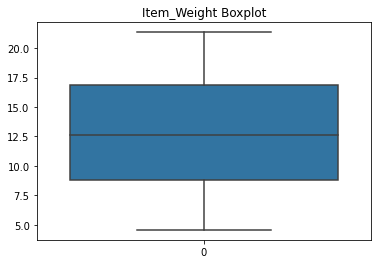

In [11]:
sns.boxplot(data=inp0['Item_Weight'])
plt.title("Item_Weight Boxplot")

In this you can see that there are no **outliers** which means that we can fill the missing data with the **mean** value for maximum efficiency.

**Outlier** refers to the one who are far from the group.

In [12]:
# impute missing value with mean
inp0["Item_Weight"]=inp0["Item_Weight"].fillna(inp0["Item_Weight"].dropna().mean())

In [13]:
# Now check the missing value
inp0.Item_Weight.isnull().sum()

0

Now imputing `Outlet_Size` coloumn which is categorical so, we will impute with the **mode value**

In [14]:
# value_counts of Outlet_Size to find the mode
inp0.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

As you can see `Medium` contains the maximium number of value so we will impute missing with `Medium` the **mode value**

In [15]:
# impute missing value of Outlet_Size with the mode value which is Medium
inp0["Outlet_Size"]=inp0["Outlet_Size"].fillna(inp0["Outlet_Size"].mode()[0])

In [16]:
# checking missing value
inp0.Outlet_Size.isnull().sum()

0

In [17]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**Now by using the info() method, we can see that we have succesfully filled all the missing data for both the coloumn.**

After dealing with the **missing value** we have done with the **data cleaning** part. Now moving to **Data Visualization** for finding the insight from the dataset.

### DATA VISUALIZATION

### Univariate Analysis

 We will separately deal with categorical and numerical coloumn
 


categorical coloumn:
`Item_Identifier`,`Item_Fat_Content`,`Item_Type`,`Outlet_Identifier`,`Outlet_Size`,`Outlet_Location_Type`,`Outlet_Type`


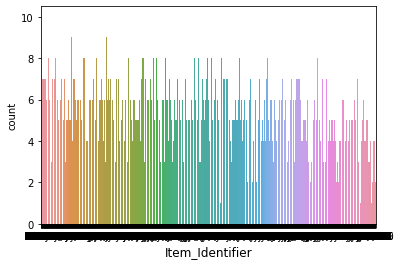

In [18]:
# Graph for Item_Identifier using countplot
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Identifier', data=inp0)
plt.xlabel('Item_Identifier', fontsize=12)
plt.show()

As we can see that we are not able to find anything from `Item_Identifier` so we will simply ignore this for now.

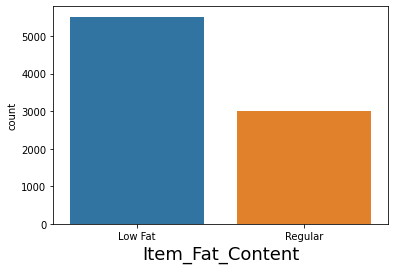

In [19]:
# Graph for Item_Fat_Content using countplot
plt.figure(figsize=(6,4))
sns.countplot(x='Item_Fat_Content', data=inp0)
plt.xlabel('Item_Fat_Content',fontsize=18)
plt.show()

In this we can conclude that more number of items is of **Low Fat** from `Item_Fat_Content`. We have use **countplot** to find which fat content item is in more quantity. By using **plt.figure()** we can fix the size of the graph.

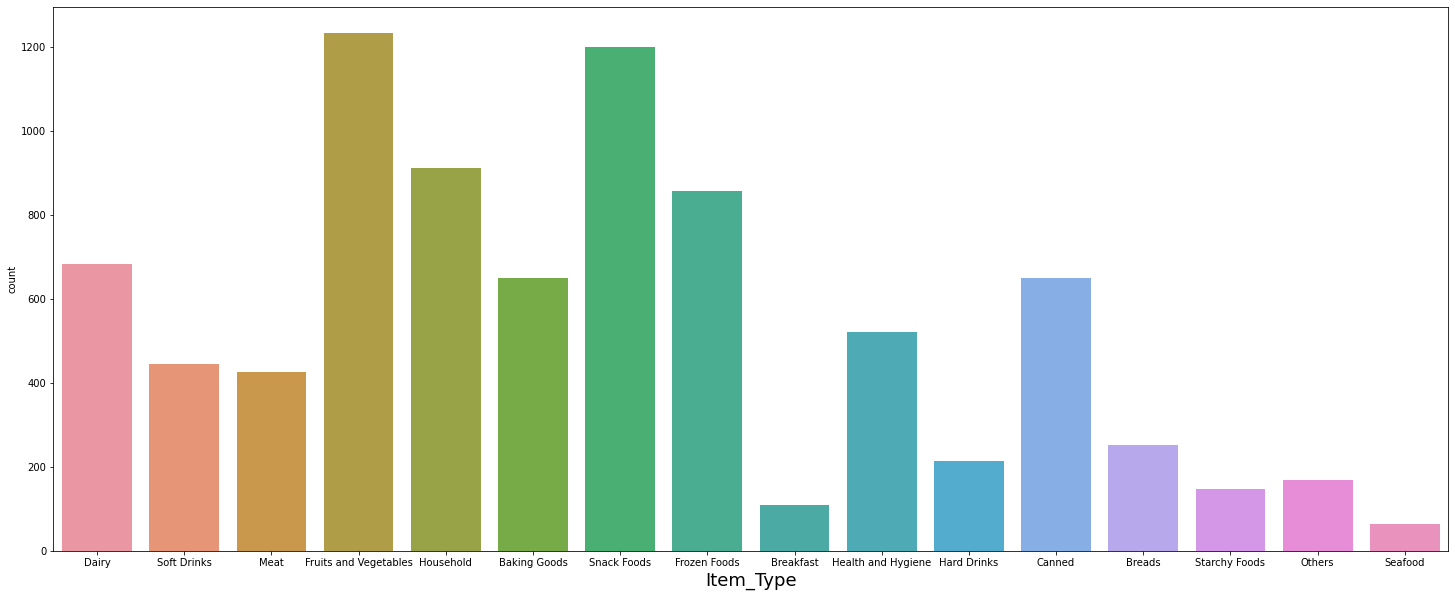

In [20]:
# Graph for Item_Type using countplot
plt.figure(figsize=(25,10))
sns.countplot(x='Item_Type', data=inp0)
plt.xlabel('Item_Type', fontsize=18)
plt.show()

In `Item_Type` by using **countplot** we find that **Fruits and Vegetables** & **Snack Foods** are the most popular among them.

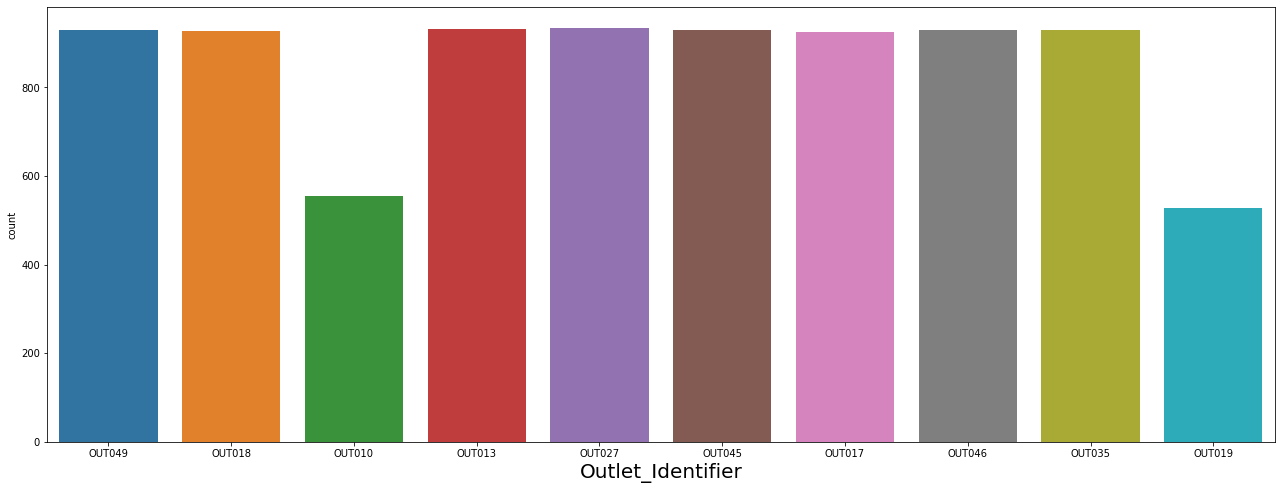

In [21]:
# Graph for Outlet_Identifier using countplot
plt.figure(figsize=(22,8))
sns.countplot(x='Outlet_Identifier', data=inp0)
plt.xlabel('Outlet_Identifier', fontsize=20)
plt.show()

In `Outlet_Identifier` using **countplot** we came to know that all the outlet are in same number except `OUT010` & `OUT019`. 

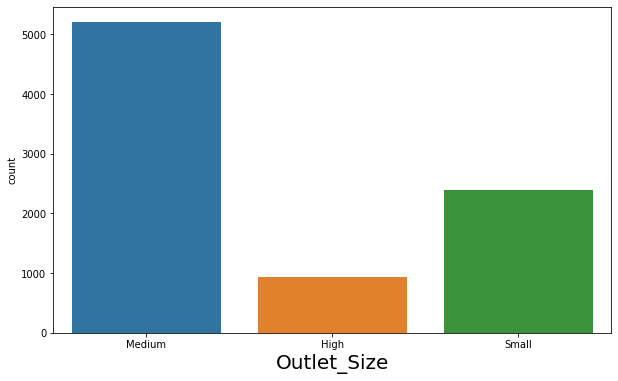

In [22]:
# Graph for Outlet_Size using countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Size', data=inp0)
plt.xlabel('Outlet_Size', fontsize= 20)
plt.show()

In `Outlet_Size` by using **countplot** we find that the most number of outlets is of `Medium` size.

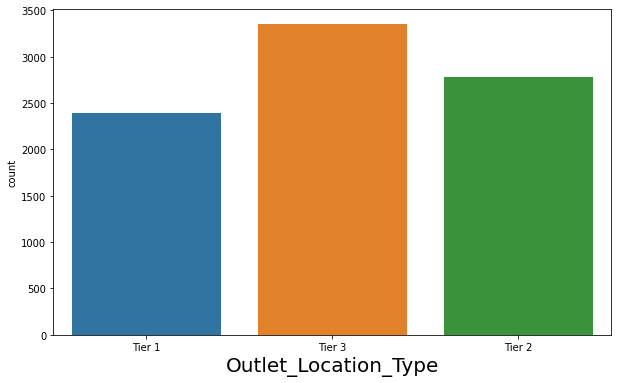

In [23]:
# Graph for Outlet_Location_Type using countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Location_Type', data=inp0)
plt.xlabel('Outlet_Location_Type', fontsize=20)
plt.show()

In `Outlet_Location_Type` by using **countplot** we find that the most common outlet location type is of `Tier 3`.

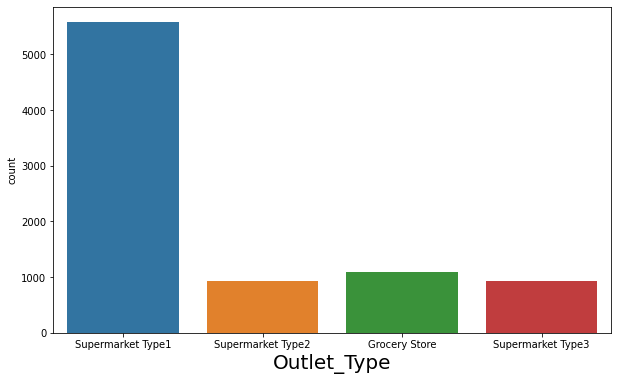

In [24]:
# Graph for Outlet_Type using countplot
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type', data=inp0)
plt.xlabel('Outlet_Type', fontsize=20)
plt.show()

In `Outlet_Type` by using **countplot** we know that `Supermarket Type1` is a mode of this by a wide margin.

#### Conclusion for Categorical Column

* `Item_Fat_Content` - Most items are of low fat.
* `Item_Type` - Item types that are distictly popular are `fruits and vegetables` and `snack foods`. 
* `Outlet_Identifier` - Outlets are ditributed evenly among excluding `OUT010` and `OUT019` that are significanly lower. 
* `Outlet_Size` - Bigmart outlets are mostly medium sized in our data. 
* `Outlet_Location_Type` - The most common type is `Tier3`.
* `Outlet_Type` - By a wide margin the mode outlet type is `Supermarket Type1`.

Now for the numerical columns:
`Outlet_Establishment_Year` ,`Item_Outlet_Sales`, `Item_Weight`, `Item_Visibility`, `Item_MRP`.

As we can't find much for numerical columns through univariate analysis. Now, we will perform bivariate analysis.

### Bivariate Analysis

We can perform **Bivariate Analysis** in three ways:
- Categorical-Categorical
- Numerical-Numerical
- Categorical-Numerical

As our main target is `Item_Outlet_Sales` . So, we will foucs on this only for now. We will perfrom Numerical-Numerical & Categorical-Numerical analysis on this.

##### Numerical-Numerical Analysis

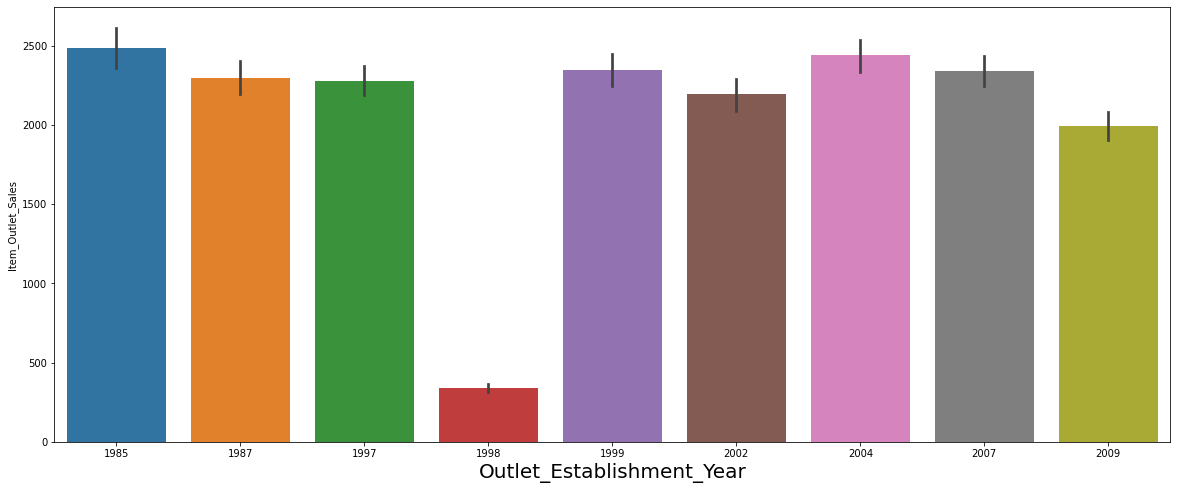

In [57]:
# Graph for Outlet_Establishment_Year & Item_Outlet_Sales using barplot
plt.figure(figsize=(20,8))
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales', data=inp0)
plt.xlabel('Outlet_Establishment_Year', fontsize=20)
plt.show()

In this we can see that year 1998 was having the least number of sales and the rest is pretty much same. What could be the reason behind this?

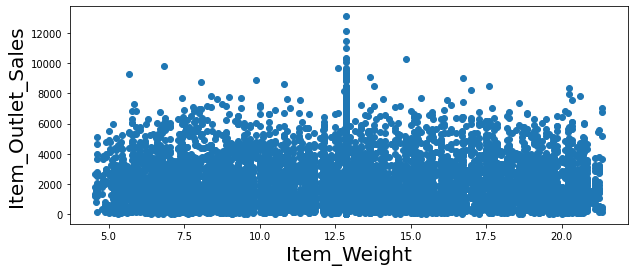

In [26]:
# Scatter Plot of Item_Outlet_Sales & Item_Weight 
plt.figure(figsize=(10,4))
plt.scatter(x='Item_Weight',y='Item_Outlet_Sales', data=inp0)
plt.xlabel('Item_Weight',fontsize=20)
plt.ylabel('Item_Outlet_Sales',fontsize=20)
plt.show() 

As you can see that there is no specific pattern in this so we cannot derive any insight from `Item_Weight`.

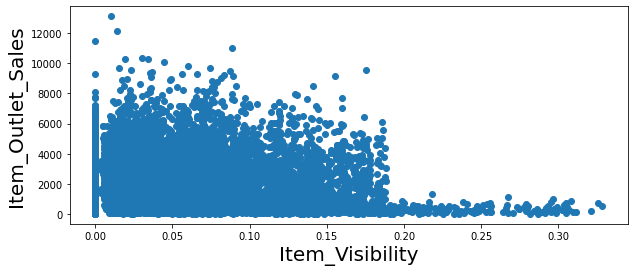

In [27]:
# Scatter Plot of Item_Outlet_Sales & Item_Visibility 
plt.figure(figsize=(10,4))
plt.scatter(x='Item_Visibility',y='Item_Outlet_Sales', data=inp0)
plt.xlabel('Item_Visibility',fontsize=20)
plt.ylabel('Item_Outlet_Sales',fontsize=20)
plt.show()

In this you can see that it appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well in some cases.

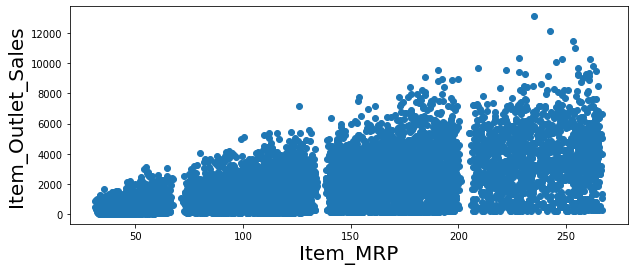

In [28]:
# Scatter Plot of Item_Outlet_Sales & Item_MRP
plt.figure(figsize=(10,4))
plt.scatter(x='Item_MRP',y='Item_Outlet_Sales', data=inp0)
plt.xlabel('Item_MRP',fontsize=20)
plt.ylabel('Item_Outlet_Sales',fontsize=20)
plt.show()

This is interesting as by seeing we came to know that items with higher MRP tend to sell better in most of the cases.

##### Categorical-Numerical Analysis

Now we will se how `Item_Outlet_Sales` varies with different categorical column of this dataset.

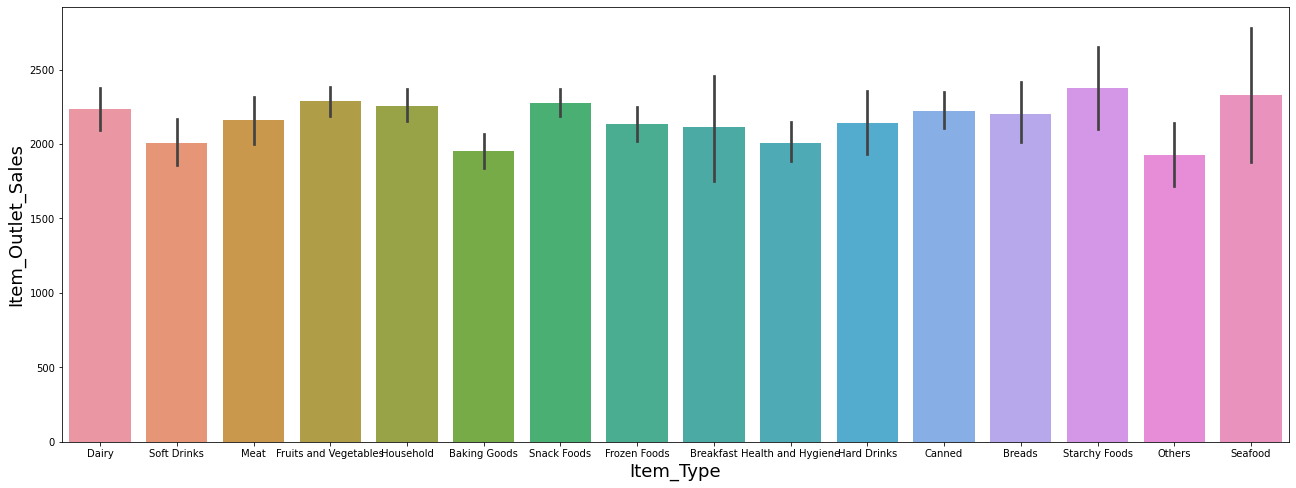

In [29]:
# Bar Plot for Item_Type with Item_Outlet_Sales
plt.figure(figsize=(22,8))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=inp0)
plt.xlabel('Item_Type', fontsize=18)
plt.ylabel('Item_Outlet_Sales', fontsize=18)
plt.show()

In this you can see that the difference between `Item_Type` by sales is very small so we cannot get anything from it.

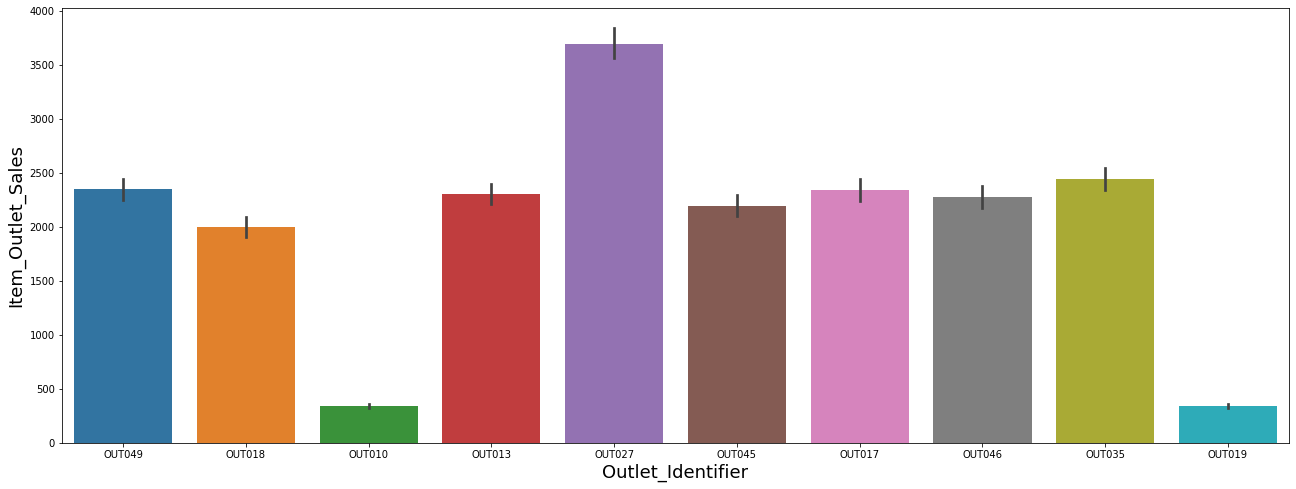

In [30]:
# Bar Plot for Outlet_Identifier with Item_Outlet_Sales
plt.figure(figsize=(22,8))
sns.barplot('Outlet_Identifier' ,'Item_Outlet_Sales', data=inp0)
plt.xlabel('Outlet_Identifier', fontsize=18)
plt.ylabel('Item_Outlet_Sales', fontsize=18)
plt.show()

As you can see that `OUT027` is the one which is the most profitable & `OUT010` ,`OUT019` are having the least sales.

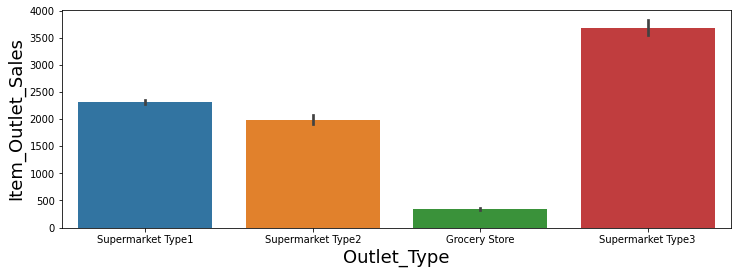

In [31]:
# Bar Plot for Outlet_Type with Item_Outlet_Sales
plt.figure(figsize=(12,4))
sns.barplot('Outlet_Type' ,'Item_Outlet_Sales', data=inp0)
plt.xlabel('Outlet_Type', fontsize=18)
plt.ylabel('Item_Outlet_Sales', fontsize=18)
plt.show()

We earlier saw that `Supermarket Type1` is the one which is a mode of this but here we find that `Supermarket Type3` is the most profitable not the type1.

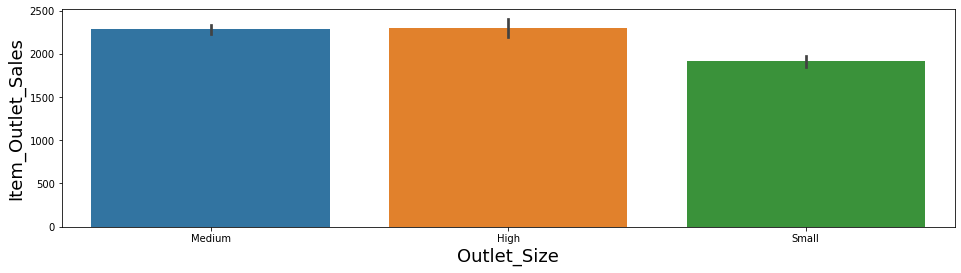

In [32]:
# Bar Plot for Outlet_Size with Item_Outlet_Sales
plt.figure(figsize=(16,4))
sns.barplot('Outlet_Size' ,'Item_Outlet_Sales', data=inp0)
plt.xlabel('Outlet_Size', fontsize=18)
plt.ylabel('Item_Outlet_Sales', fontsize=18)
plt.show()

In this we find that `Medium` & `High` Outlet sizes are pretty much same in their respective sales.

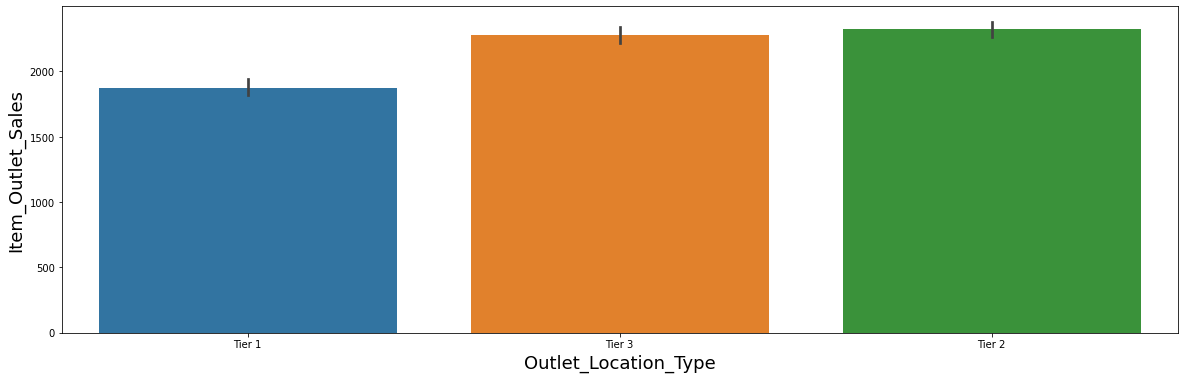

In [33]:
# Bar Plot for Outlet_Location_Type with Item_Outlet_Sales
plt.figure(figsize=(20,6))
sns.barplot('Outlet_Location_Type' ,'Item_Outlet_Sales', data=inp0)
plt.xlabel('Outlet_Location_Type', fontsize=18)
plt.ylabel('Item_Outlet_Sales', fontsize=18)
plt.show()

In this `Tier 3` and `Tier 2` is almost similar in sales just by a small margin `Tier 2` is higher than `Tier 3` but that does not make such a big difference.

#### Conclusion from Bivariate Analysis:

* `Item_Weight`- There is no specific pattern in this.
* `Item_Visibility`-  Appears to be spreaded as well but some concentration around the (0,0) indicate small visibility items are not selling well is some cases.
* `Item_MRP`- Items with higher MRP tend to sell better in most cases.
* `Item_Type`-The difference in item types by sales is very small.
* `Outlet_Identifier`-Outlet 27 is the most profitable and there is a big diffrence between each specific outlet sales.
* `Outlet_Type`-Suprisingly supermarket type 3 is the most profitable and not type 1.
* `Outlet_Size`-Medium and high outlet sizes are pretty much even in sales.
* `Outlet_Location_Type`-Tier 2 and 3 are almost even being the highest in sales but tier 2 is slightly larger. 
* `Outlet_Establishment_Year`-1988 was having the least number of sales and the rest is pretty much constant.

Now we will see the `Correlation` between the variables by using a `Heatmap`.

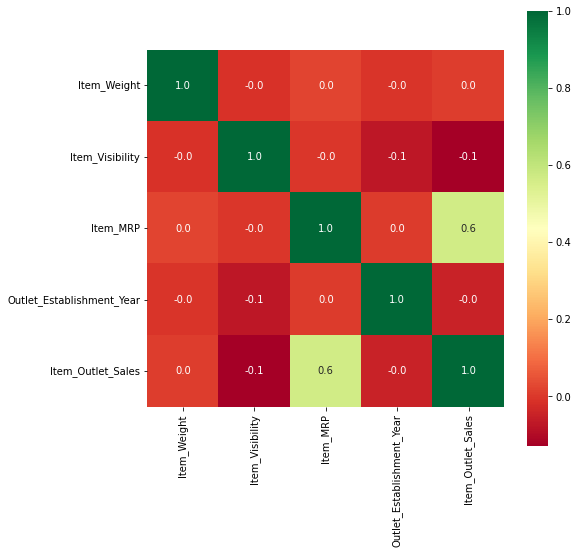

In [34]:
corr = inp0.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,cbar=True,square=True,fmt='.1f',annot=True,cmap='RdYlGn')

Here you can see that `Item_MRP` is highly correlated with `Item_Outlet_Sales` that means if MRP increases then sales increases.

###Statistical Analysis

Now we will perform statistical analysis on our numerical column for checking that if they follow a `Normal Distribution` or not.


We will take a `samp_size` of 35 and we are considering 1000 such samples for finding a mean of their mean.

In [35]:
samp_size=35

In [36]:
sample_means= [inp0.Item_Outlet_Sales.sample(samp_size).mean() for i in range(1000)]
sample_means=pd.Series(sample_means)

In [37]:
sample_means.mean()

2183.554027611429

In [38]:
inp0.Item_Outlet_Sales.mean()

2181.288913575032

Here, you can see that our sample mean is approximately same as population mean of `Item_Outlet_Sales`.
Now we will plot it and see whether it follow a normal distribution or not.

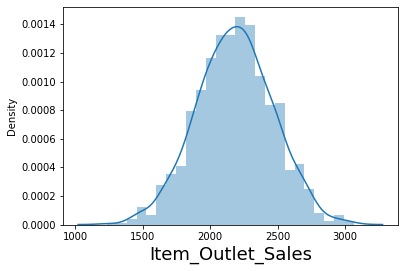

In [39]:
sns.distplot(sample_means)
plt.xlabel('Item_Outlet_Sales',fontsize=18)
plt.show()

As you can see it follow a Normal Distribution. Similarly we will do `Item_MRP` also.

In [40]:
sample_means= [inp0.Item_MRP.sample(samp_size).mean() for i in range(1000)]
sample_means=pd.Series(sample_means)

In [41]:
sample_means.mean()

140.45474206285715

In [42]:
inp0.Item_MRP.mean()

140.9927819781767

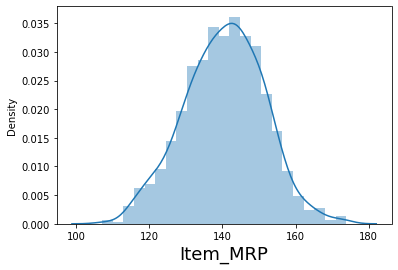

In [43]:
sns.distplot(sample_means)
plt.xlabel('Item_MRP',fontsize=18)
plt.show()

It also follows a Normal Distributions.

###Multivariate Analysis

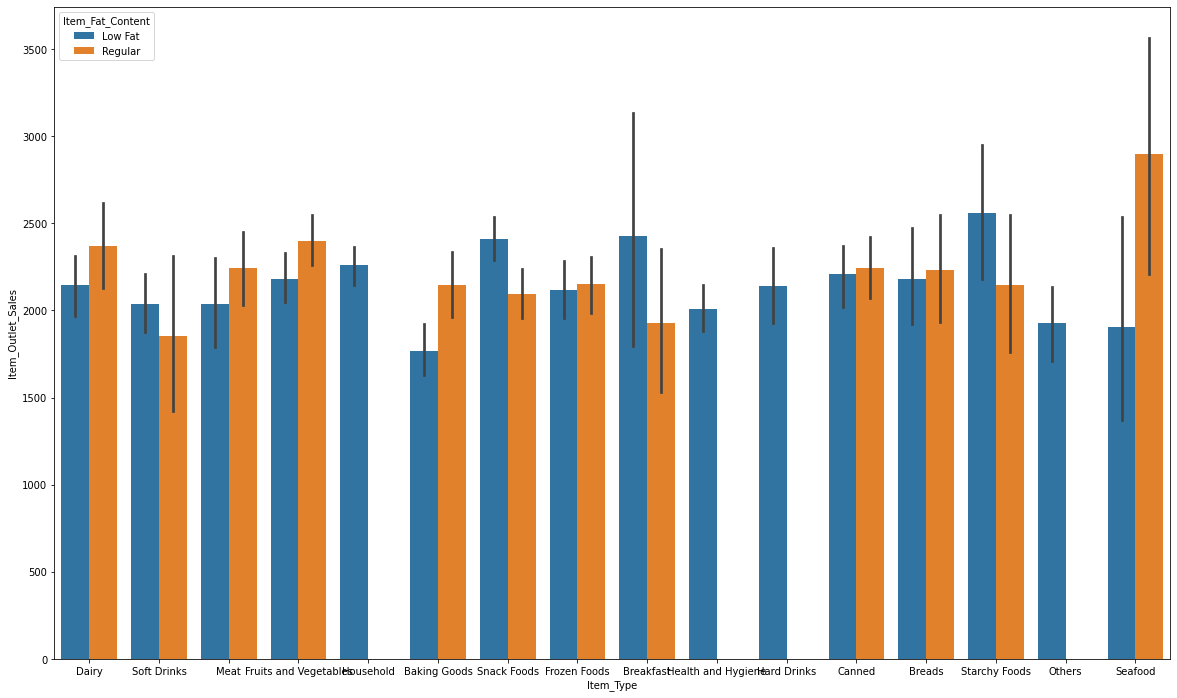

In [44]:
plt.figure(figsize=(20,12))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=inp0,hue='Item_Fat_Content')


We had performed an multivariate analysis on `Item_Type` , `Item_Outlet_Sales` & `Item_Fat_Content`. In this we can see that `Seafood` is having highest sales in which fat content is `Regular`. In all others item type `Low Fat` & `Regular` are having almost even sales.

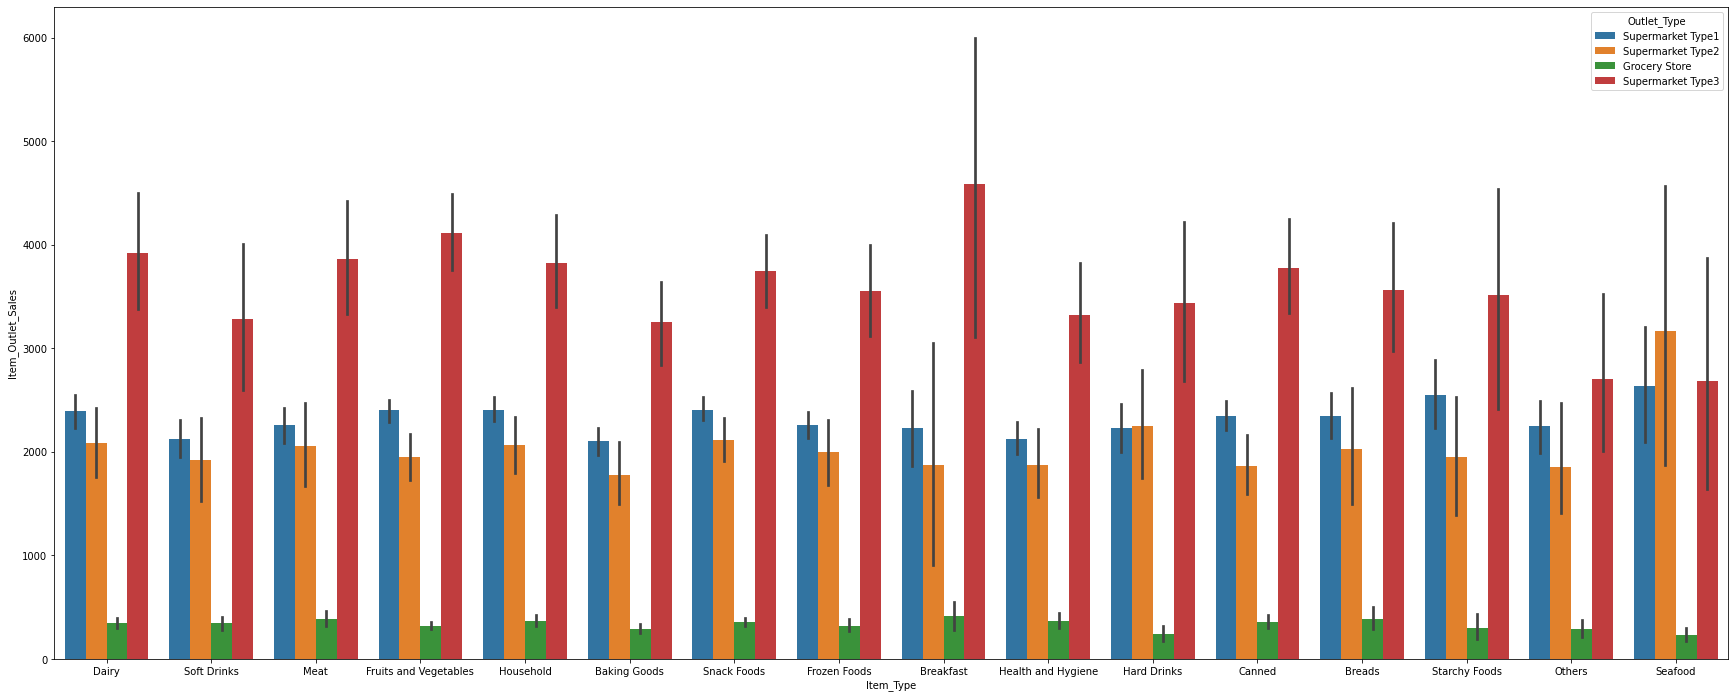

In [45]:
plt.figure(figsize=(30,12))
sns.barplot('Item_Type' ,'Item_Outlet_Sales', data=inp0,hue='Outlet_Type')


In this we had taken `Item_Type`,`Item_Outlet_Sales`& `Outlet_Type`. We had find that `Supermarket Type3` is having highest sales for all the item type whereas `Grocery Store` is having least sales for all the item type.

Now we have done with our analysis part and we have found that some of the column is of no use so we should drop them. `Item_Identifier` & `Outlet_Identifier` is of no use so will drop them.

In [46]:
inp0.drop(['Item_Identifier', 'Outlet_Identifier'], axis=1, inplace=True)


In [47]:
inp0.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


### ASSUMPTIONS


* Sale is very less in the year 1998 may be its due to the financial crisis of south asia.
* We have seen that `Item_MRP` is having some relation with 
`Item_Outlet_Sales` i.e. sales increases when MRP increases. 
May be people are assuming that if the items are of high price 
then their quality is good that’s why these thing is happening . 
So, Company should increase the amount of lower MRP by a 
little margin so that we can get sales from lower price product 
also. 
* We had saw that Grocery store is having least sales that means 
they are having items is of low price or their Outlet size is small 
. So, company should think about them as they should increase 
the price or their size else they should close them and focus on 
one which provide them maximum sales.

### CONCLUSION


I have taken dataset of bigmart sales in which there are 8523 
rows and 12 columns. We had perform analysis on them first of 
all we had cleared the data and deal with their irregularity. Our 
main focus is on `Item_Outlet_Sales` that how can we improve 
the sales of the company. I had done univariate, bivariate and 
multivariate analysis on the columns and found that 
`Item_MRP` is highly correlated with `Item_Outlet_Sales`. If 
the price is high then outlet sales is high. In `Item_Type` Fruits 
and Vegetables & Snack Foods are the most popular among 
them. We had saw that `OUT010` and `OUT019` are having lower
sold items in comparison to other outlets. Surprisingly we found 
that `Supermarket Type3` is the most profitable one not 
`Supermarket Type1` as it was in more number.
`Item_Identifier` , `Item_Weight` are the columns from which 
we cant find anything so we can drop from out dataset. So that it 
will help us while building model for that . In the end , I will 
suggest company that they should focus on increasing the MRP 
and close the stores and outlet which are giving least sales and 
focus on the product which provide them maximum profit.